In [1]:
from catenets.datasets import load
from src.iterpretability.simulate import Simulator, SyntheticSimulator
from src.iterpretability.datasets.data_loader import load
import seaborn as sns
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X_raw = load('tcga_10')
sim = SyntheticSimulator(X_raw, num_important_features=2)

In [3]:
sim.prog_weights

array([-0.25091976,  0.90142861,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ])

In [4]:
sim.pred0_weights

array([-0.        ,  0.        ,  0.66488528, -0.57532178, -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ])

In [5]:
sim.pred1_weights

array([ 0.        , -0.        , -0.        , -0.        , -0.08786003,
        0.57035192, -0.        ,  0.        ,  0.        , -0.        ])

In [6]:
X, W_synth, Y_synth, po0, po1, propensity = sim.simulate_dataset(X_raw, predictive_scale=2)

<AxesSubplot:ylabel='Density'>

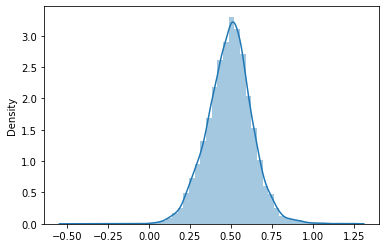

In [7]:
sns.distplot(po0)

<AxesSubplot:ylabel='Density'>

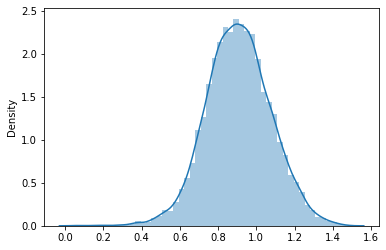

In [8]:
sns.distplot(po1)

<AxesSubplot:ylabel='Density'>

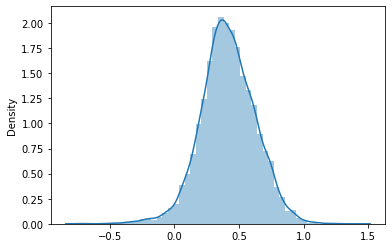

In [9]:
sns.distplot(po1-po0)

/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

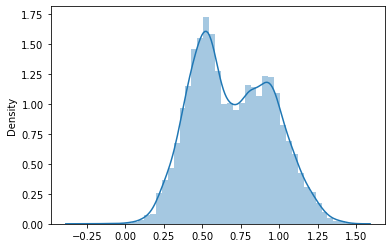

In [10]:
sns.distplot(Y_synth)

In [10]:
import numpy as np
from catenets.models.torch import TLearner
from src.iterpretability.explain import Explainer

X_train, W_train, Y_train = X[:9000], W_synth[:9000], Y_synth[:9000]

learner = TLearner(
    X_train.shape[1], binary_y=(len(np.unique(Y_train)) == 2), n_iter=100
)
learner.fit(X=X_train, y=Y_train, w=W_train)
explainer = Explainer(learner, feature_names=list(range(X_train.shape[1])))

In [11]:
explanations = explainer.explain(X[-2:])


/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/deep_lift.py:323: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It is recommended to compute attributions for one example at a time.
  "You are providing multiple inputs for Lime / Kernel SHAP "
/Users/ibica/anaconda3/envs/medkit/lib/python3.6/site-packages/captum/attr/_core/lime.py:1102: UserWarning: You are providing multiple inputs for Lime / Kernel SHAP attributions. This trains a separate interpretable model for each example, which can be time consuming. It i

In [12]:
explanations

{'feature_ablation': array([[-7.7393830e-02, -6.1817408e-02, -7.2205079e-01,  6.7042828e-02,
         -3.8956046e-02,  9.4885230e-03, -2.9520988e-03, -9.4889224e-02,
         -3.6404252e-02,  2.4666494e-01],
        [ 1.9829410e-01,  2.4570525e-02, -1.8996042e-01,  3.3730817e-01,
          4.5090914e-04,  4.1614735e-01, -1.4837432e-01, -4.6213388e-02,
          3.4400880e-02,  6.5516770e-02]], dtype=float32),
 'integrated_gradients': array([[-0.0555977 , -0.04636516,  0.01069627,  0.09263336,  0.0407377 ,
         -0.02709719, -0.00681531, -0.07271454,  0.07179018, -0.02783428],
        [ 0.09189495, -0.01716948, -0.12656366, -0.05475099, -0.02579799,
          0.058115  ,  0.08027247,  0.00994629, -0.06152679,  0.10210159]]),
 'deeplift': array([[ 0.0454191 , -0.21572232, -0.04263835,  0.01307389, -0.02854567,
         -0.0148549 ,  0.20411439, -0.18100661, -0.2280369 ,  0.26406503],
        [ 0.0444718 ,  0.18284428, -0.31436077, -0.12570834,  0.12927   ,
          0.24149273, -0.190